In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots  import influence_plot

In [8]:
startup=pd.read_csv("50_Startups.csv")

In [9]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


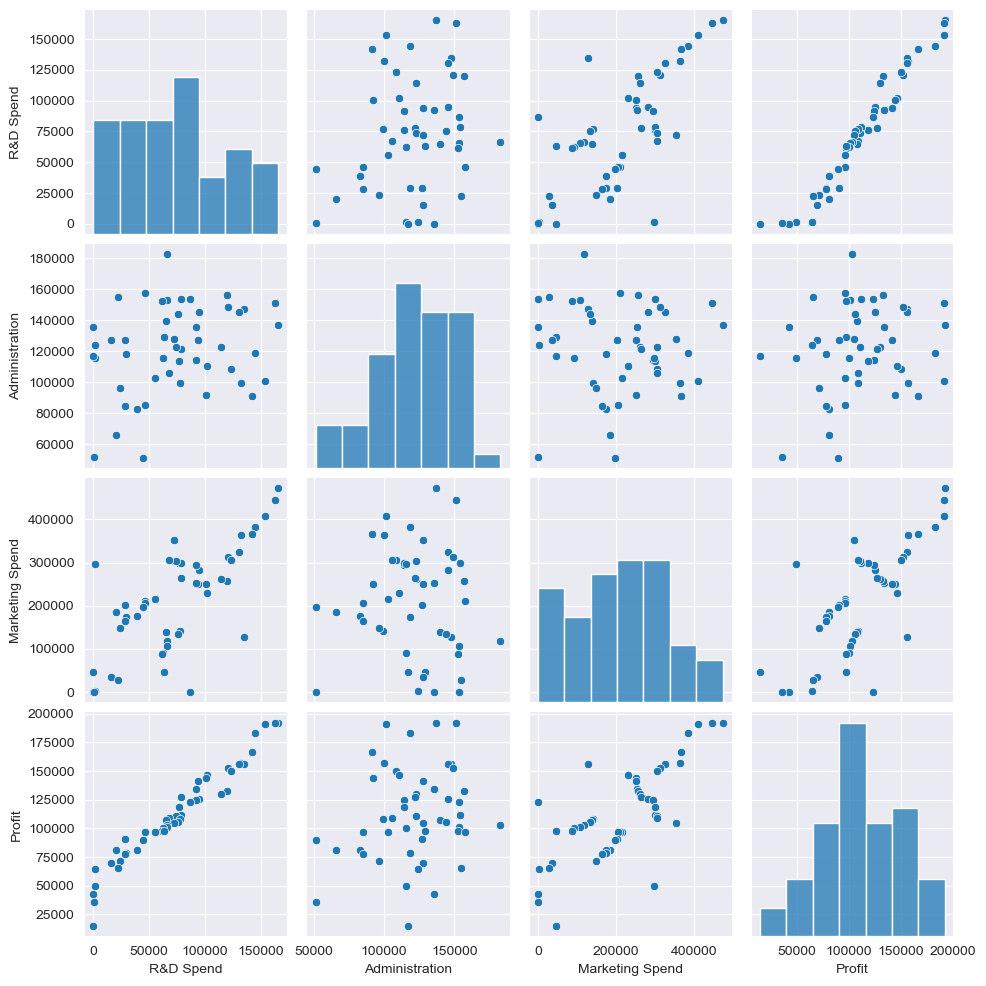

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [15]:
startups=startup.rename({'R&D Spend':'rd','Administration':'admin','Marketing Spend':'ms'},axis=1)
startups

,rd,admin,ms,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [16]:
model1=smf.ols('Profit~rd+admin+ms',data=startups).fit()

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        15:20:42   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd             0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
ms             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here the rd is significant and admin and ms are insignificant.

# MODEL BUILDING

In [18]:
mlv=smf.ols('Profit~admin',data=startups).fit()
print("p-value of admin:",'\n', mlv.pvalues)

p-value of admin: 
 Intercept    0.003824
admin        0.162217
dtype: float64


In [19]:
mlv1=smf.ols('Profit~ms',data=startups).fit()
print("p-value of ms",'\n', mlv1.pvalues)

p-value of ms 
 Intercept    4.294735e-10
ms           4.381073e-10
dtype: float64


In [20]:
mlv3=smf.ols('Profit~admin+ms',data=startups).fit()
mlv3.pvalues

Intercept    2.589341e-01
admin        1.729198e-02
ms           9.727245e-11
dtype: float64

we use VIF to solve multi-collinearity between admin and rs

In [21]:
rsq1=smf.ols('rd~admin+ms',data=startups).fit().rsquared
vif1=1/(1-rsq1)
print("VIF of rd:",vif1)

VIF of rd: 2.4689030699947017


In [22]:
rsq2=smf.ols('ms~admin+rd',data=startups).fit().rsquared
vif2=1/(1-rsq2)
print("VIF of ms:",vif2)

VIF of ms: 2.3267732905308773


In [23]:
rsq3=smf.ols('admin~rd+ms',data=startups).fit().rsquared
vif3=1/(1-rsq3)
print("VIF of admin:",vif3)

VIF of admin: 1.1750910070550458


In [24]:
data={'parameter':['rd','admin','ms'],'VIF':[vif1,vif2,vif3]}
vif=pd.DataFrame(data)
vif

,parameter,VIF
0,rd,2.468903
1,admin,2.326773
2,ms,1.175091


MODEL VALIDATION TECHNIQUE:1)Q-Q PLOT

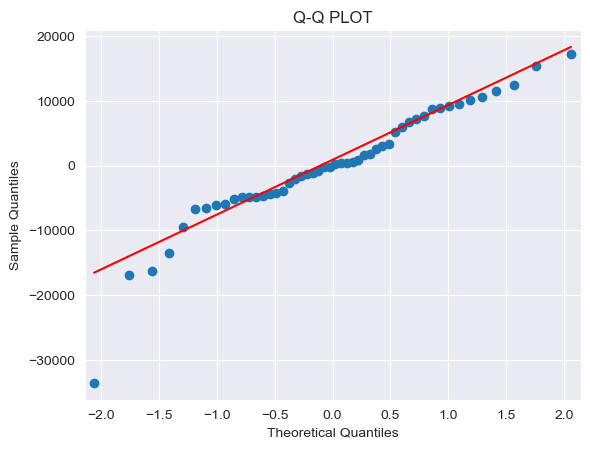

In [25]:
import statsmodels.api as smf

qqplot=smf.qqplot(model1.resid,line='q')
plt.title("Q-Q PLOT")
plt.show()

In [26]:
values=(np.where(model1.resid>15))

In [27]:
values

(array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64),)

2)residual plot

In [28]:
def get_standardized_values(vals):
    return(vals-vals.mean()/vals.std())

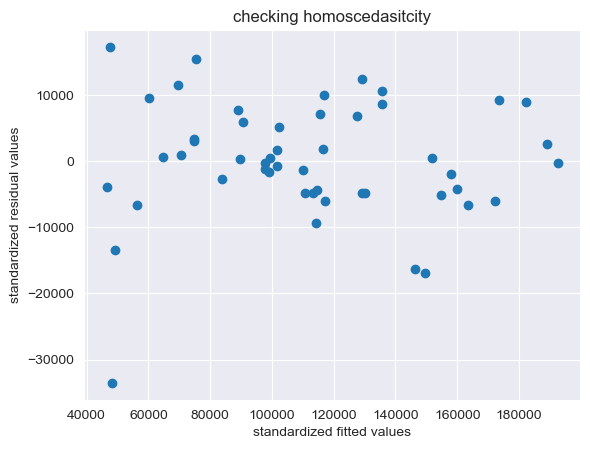

In [29]:
plt.scatter(get_standardized_values(model1.fittedvalues),
           get_standardized_values(model1.resid))

plt.title("checking homoscedasitcity")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

### Analysis of influential observations:Detection and Deletion

In [30]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

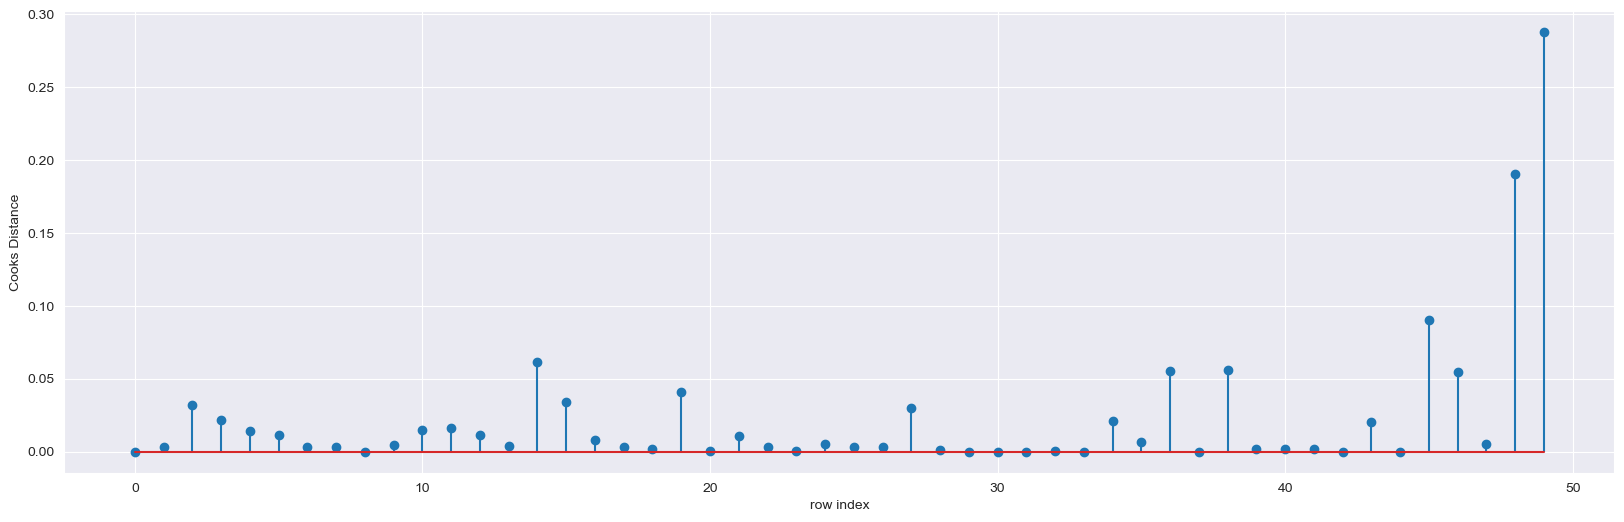

In [31]:
fig = plt.subplots(figsize=(20, 6))
plt.stem(np.arange(len(startups)), np.round(c, 5))
plt.xlabel('row index')
plt.ylabel('Cooks Distance')
plt.show()



In [32]:
(np.argmax(c),np.max(c))


(49, 0.28808229275432634)

Influence plot

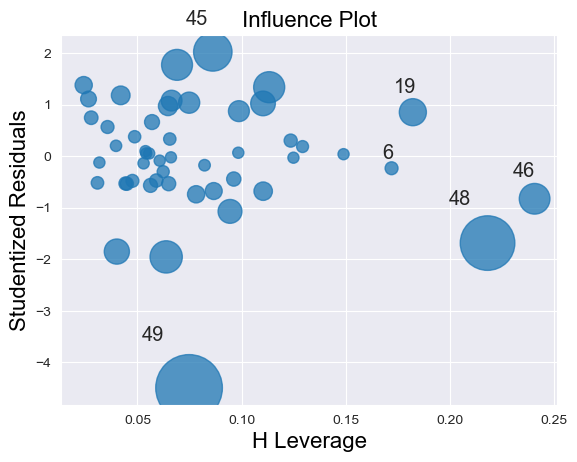

In [33]:
influence_plot(model1)
plt.show()

In [34]:
k= 3 
n= startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.24

In [35]:
startups[startups.index.isin([49])]

,rd,admin,ms,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [36]:
data=startups.drop(startups.index[[49]],axis=0).reset_index(drop=True)
data
data=data.rename({'R&D Spend':'RDS','Marketing Spend':'MS'},axis=1)
data

,rd,admin,ms,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
finalmodel= smf.ols('Profit~rd+admin+ms',data =data).fit() 
(finalmodel.rsquared,finalmodel.aic,finalmodel.bic)

(0.9613162435129847, 1020.5652974526367, 1028.1325786450793)

In [41]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           8.85e-32
Time:                        15:21:44   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd             0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
ms             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model_influence = finalmodel.get_influence()
(c, _) = model_influence.cooks_distance

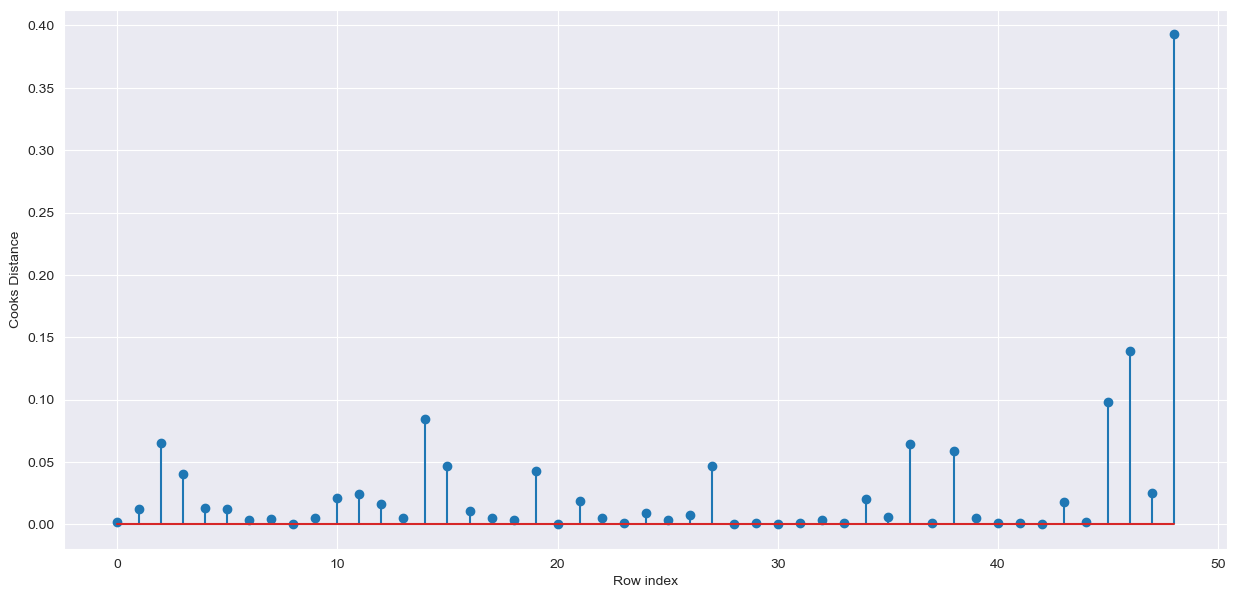

In [43]:
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(data)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
(np.argmax(c),np.max(c))

(48, 0.39274420556321554)

In [46]:
data1=data.drop(data.index[[48]],axis=0)  
data1

,rd,admin,ms,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
finalmodel1= smf.ols('Profit~rd+admin+ms',data = data1).fit() 

In [49]:
(finalmodel1.rsquared,finalmodel1.aic,finalmodel1.bic)

(0.9626766170294073, 994.6690439260116, 1002.1538479696432)

In [50]:
model_influence = finalmodel1.get_influence()
(c, _) = model_influence.cooks_distance

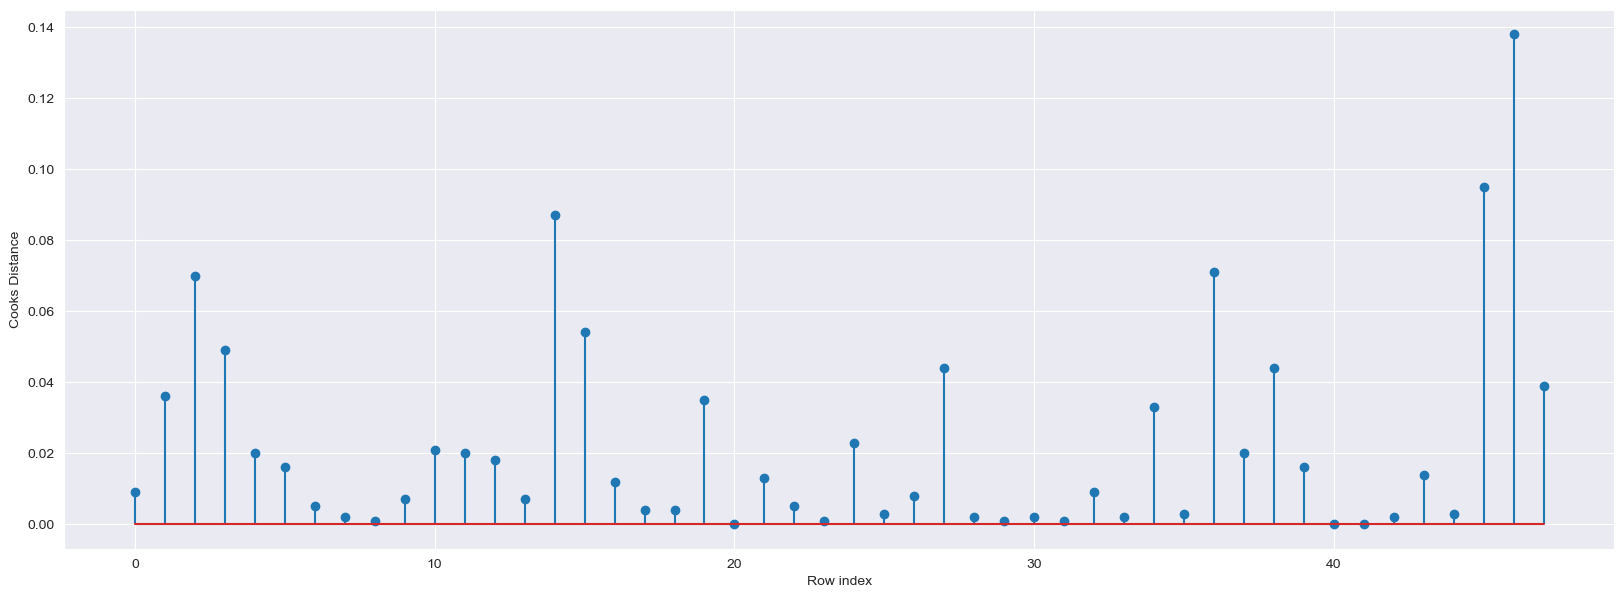

In [51]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
(np.argmax(c),np.max(c))
data2=data1.drop(data1.index[[46]],axis=0)  
data2.shape 

(47, 5)

In [53]:
finalmodel2= smf.ols('Profit~rd+admin+ms',data = data2).fit()

In [54]:
(finalmodel2.rsquared,finalmodel2.aic,finalmodel2.bic)

(0.9614129113440602, 973.2489443962857, 980.6495348031259)

In [55]:
model2influence = finalmodel2.get_influence()
(c, _) = model2influence.cooks_distance 

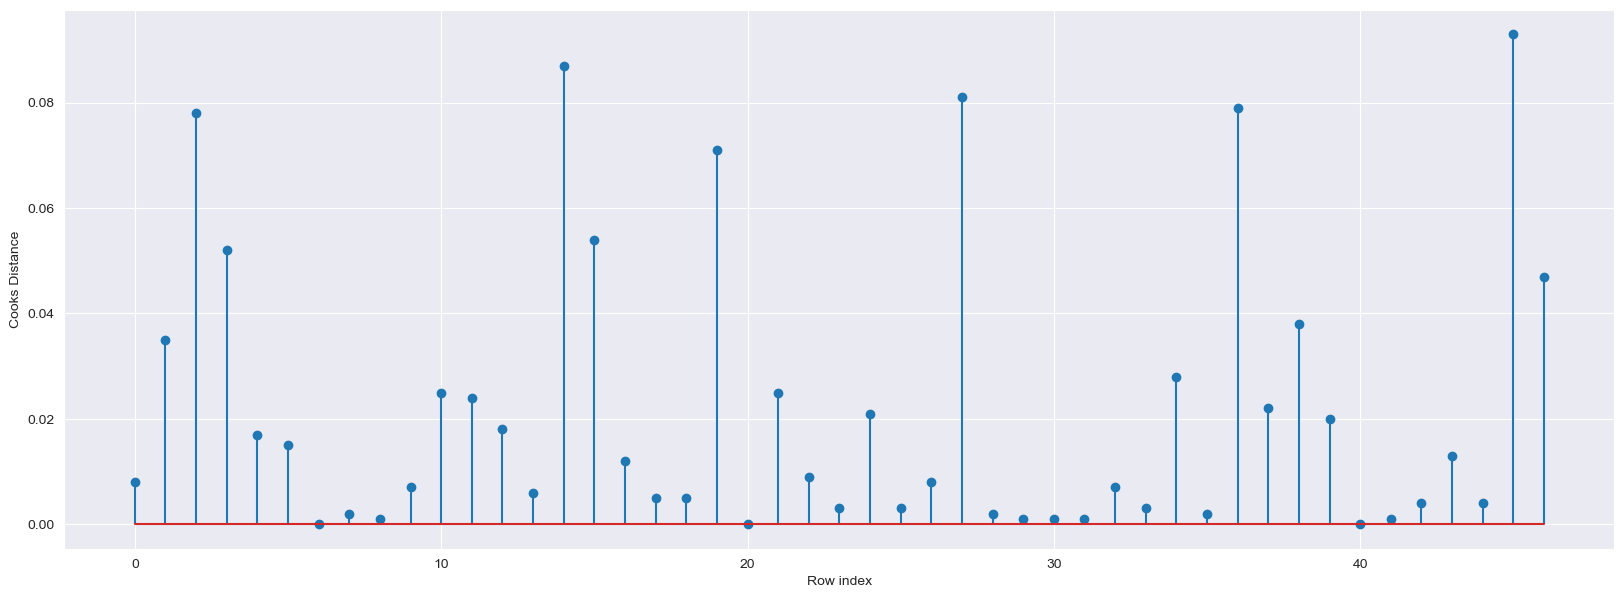

In [56]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [57]:
(np.argmax(c),np.max(c)) 

(45, 0.0928337320509411)

In [60]:
newdata=pd.DataFrame({'rd':90000,"admin":190000,"ms":140000},index=[47])
newdata

,rd,admin,ms
47,90000,190000,140000


In [61]:
finalmodel2.predict(newdata)

47    120413.188637
dtype: float64

In [63]:
pred_val=finalmodel2.predict(data2)
pred_val

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
47     51024.934949
dtype: float64